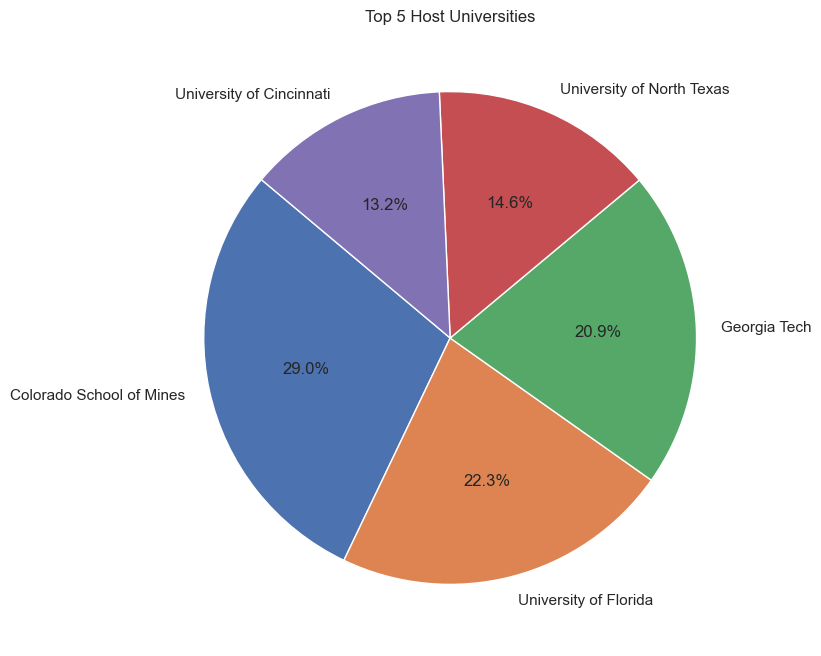

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to open Excel file
#def open_excel(file_path):
    #return pd.read_excel(file_path)

df=pd.read_excel('Book2.xlsx')

# Clean column naes

# Set visualization style
sns.set(style="whitegrid")

# Pie chart: Top 5 universities
top_universities = df['Name of Host University'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_universities, labels=top_universities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Host Universities')
plt.show()




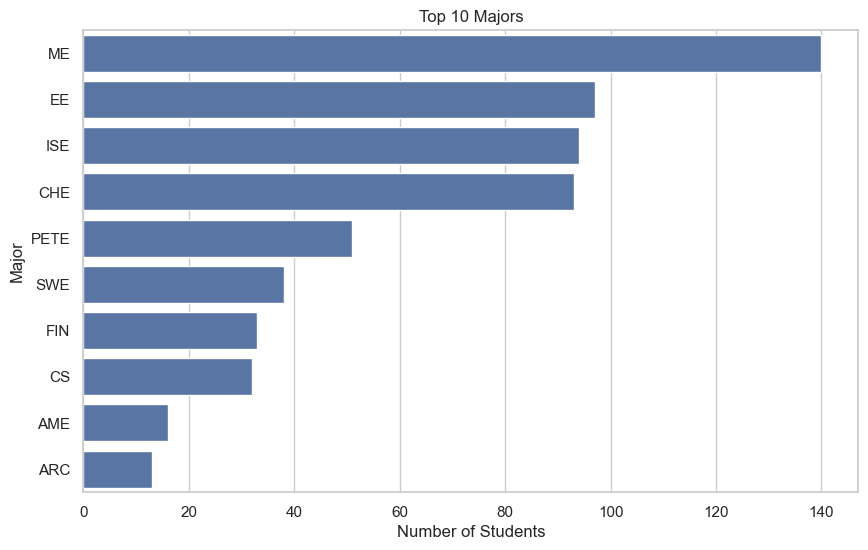

In [9]:
# Bar chart: Top 10 majors
top_majors = df['Major'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_majors.values, y=top_majors.index)
plt.xlabel('Number of Students')
plt.title('Top 10 Majors')
plt.show()

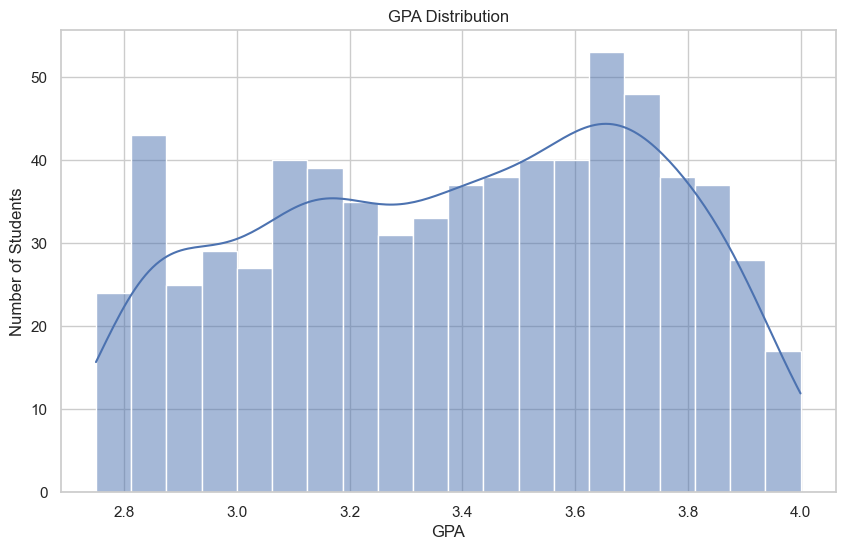

In [39]:
# Histogram: GPA distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA'], bins=20, kde=True)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.show()

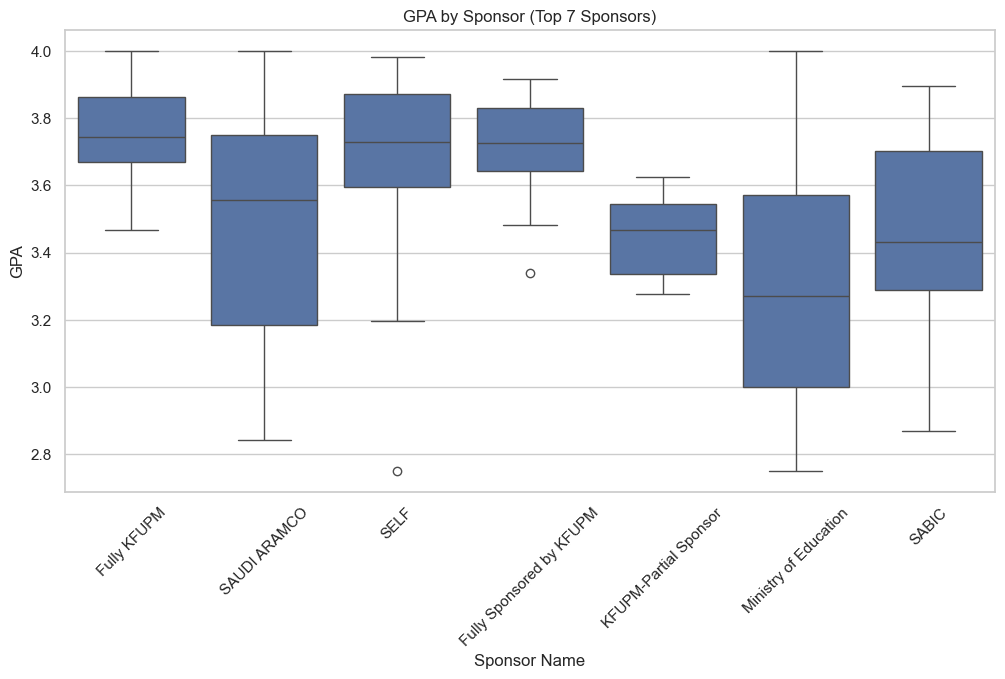

In [41]:
# Box plot: GPA by sponsor (top 7)
top_sponsors = df['Sponsor Name'].value_counts().head(7).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Sponsor Name'].isin(top_sponsors)], x='Sponsor Name', y='GPA')
plt.title('GPA by Sponsor (Top 7 Sponsors)')
plt.xticks(rotation=45)
plt.show()

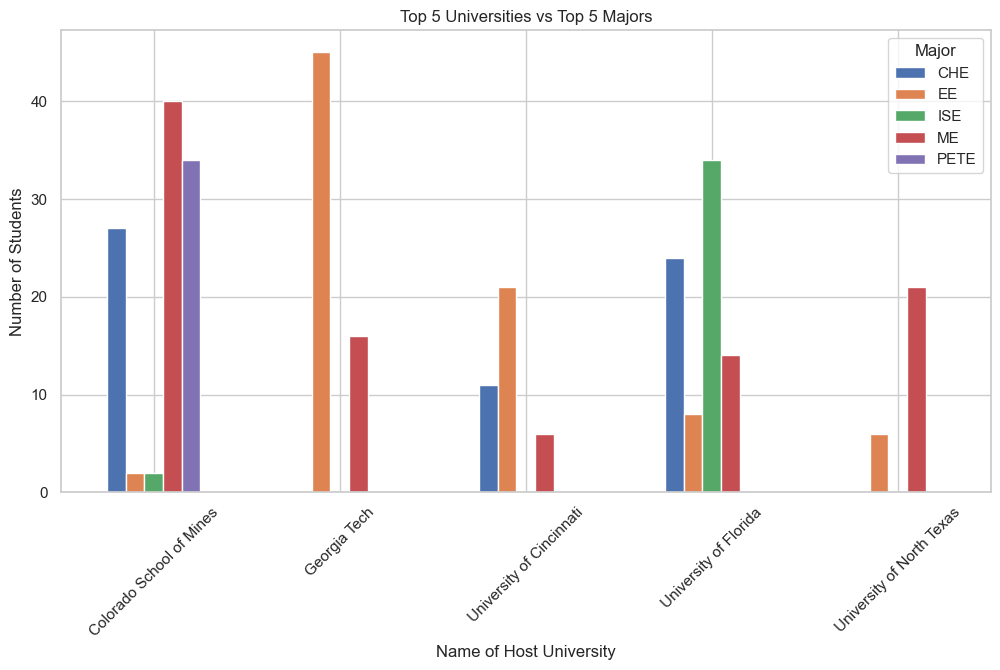

In [42]:
# Clustered bar chart: Top 5 universities vs Top 5 majors
top_5_unis = df['Name of Host University'].value_counts().head(5).index
top_5_majors = df['Major'].value_counts().head(5).index
cluster_data = df[df['Name of Host University'].isin(top_5_unis) & df['Major'].isin(top_5_majors)]
cluster_plot_data = cluster_data.groupby(['Name of Host University', 'Major']).size().unstack(fill_value=0)
cluster_plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Universities vs Top 5 Majors')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Major')
plt.show()

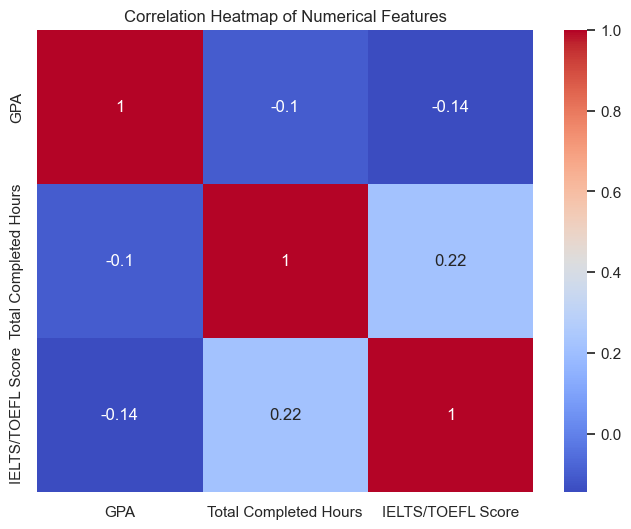

In [44]:
# Heatmap: Correlation of GPA with numerical features
numerical_cols = df[['GPA', 'Total Completed Hours', 'IELTS/TOEFL Score']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [45]:
# Create a new column to distinguish between IELTS and TOEFL
# Rule of thumb: IELTS scores range from 0 to 9, TOEFL typically ranges from 0 to 120
# We'll assume anything ≤ 9.5 is IELTS, and anything > 9.5 is TOEFL

df['Test Type'] = df['IELTS/TOEFL Score'].apply(lambda x: 'IELTS' if x <= 9.5 else 'TOEFL')

# Display value counts to confirm
df['Test Type'].value_counts()


Test Type
TOEFL    598
IELTS    104
Name: count, dtype: int64

In [46]:
df.sample(5)

,Gender,Nationality,Major,GPA,Total Completed Hours,IELTS/TOEFL Score,Sponsor Name,Name of Host University,Test Type
411,Male,Saudi Arabia,EE,3.882,76,87.0,Ministry of Education,University of Notre Dame,TOEFL
568,Male,NaN,ACHE,3.451,66,78.0,Ministry of Education,University of Florida,TOEFL
656,Male,NaN,ME,3.842,38,74.0,Ministry of Education,MIT,TOEFL
633,Male,NaN,ME,3.351,37,99.0,Ministry of Education,Colorado School of Mines,TOEFL
251,Male,Saudi Arabia,EE,3.658,38,73.0,Ministry of Education,Georgia Tech,TOEFL


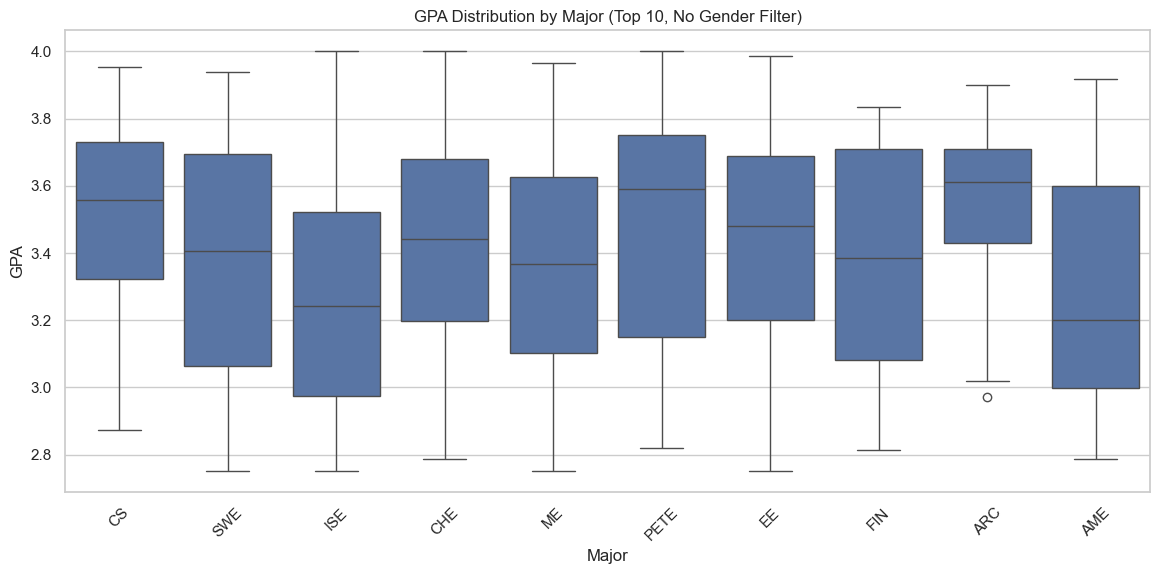

In [47]:
# 2. GPA distribution by Major (top 10 majors, without gender)
top_10_majors = df['Major'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Major'].isin(top_10_majors)], x='Major', y='GPA')
plt.xticks(rotation=45)
plt.title('GPA Distribution by Major (Top 10, No Gender Filter)')
plt.show()

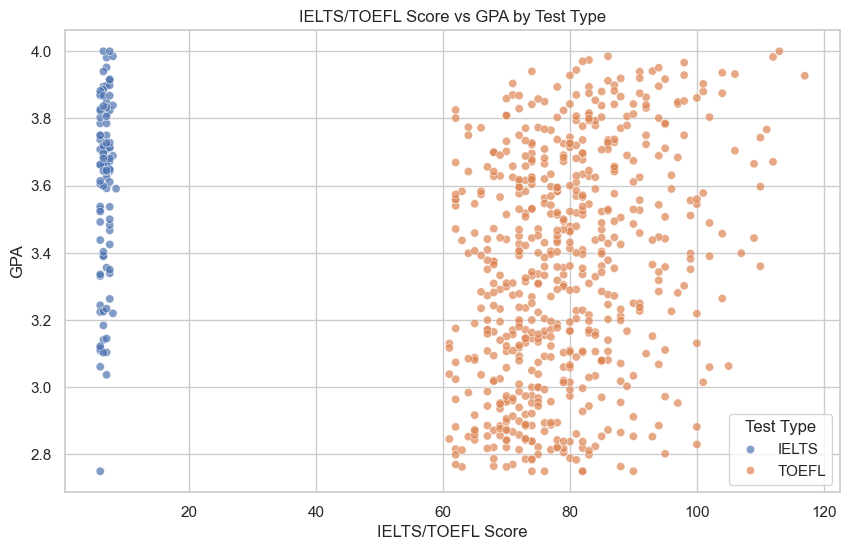

In [65]:
# Clustered scatter plot by Test_Type (IELTS vs TOEFL)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IELTS/TOEFL Score', y='GPA', hue='Test Type', alpha=0.7)
plt.title('IELTS/TOEFL Score vs GPA by Test Type')
plt.xlabel('IELTS/TOEFL Score')
plt.ylabel('GPA')
plt.legend(title='Test Type')
plt.show()


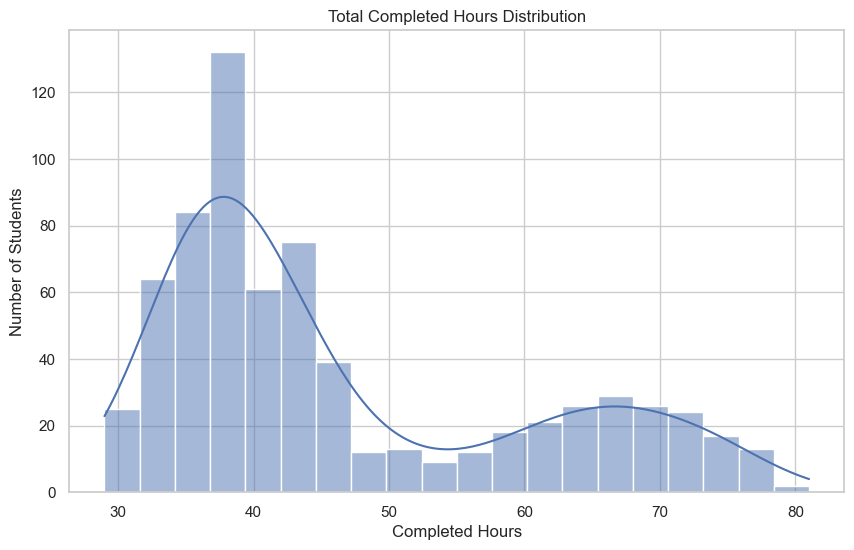

In [49]:
# 5. Total completed hours distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Completed Hours'], bins=20, kde=True)
plt.title('Total Completed Hours Distribution')
plt.xlabel('Completed Hours')
plt.ylabel('Number of Students')
plt.show()

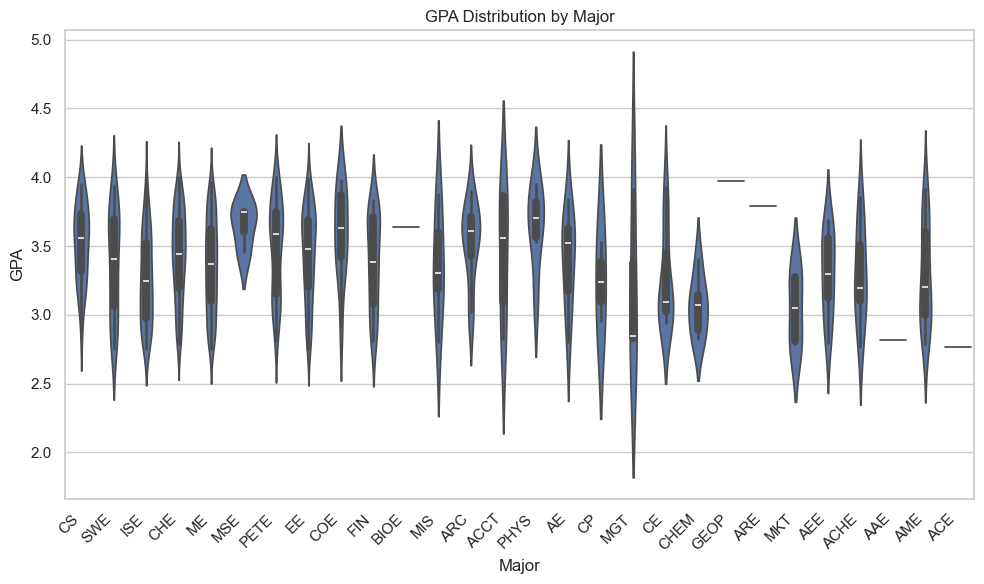

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.violinplot(x="Major", y="GPA", data=df)
plt.xticks(rotation=45, ha="right")
plt.title("GPA Distribution by Major")
plt.tight_layout()
plt.show()


/var/folders/1f/ljg2bqr129ddvcdjb2tmm3cw0000gn/T/ipykernel_34953/1598228059.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


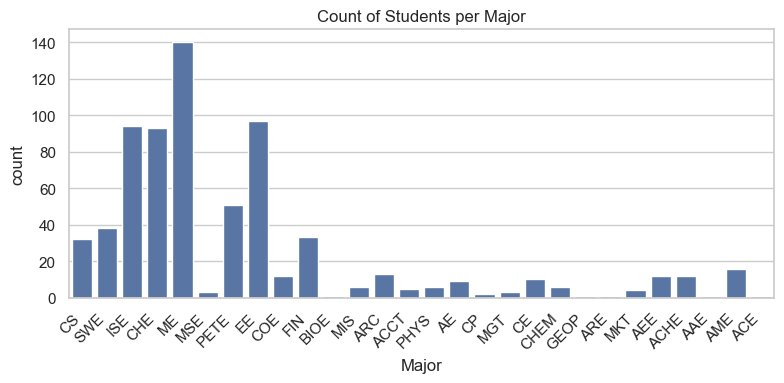

In [51]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="Major", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Count of Students per Major")
plt.tight_layout() 
plt.show()

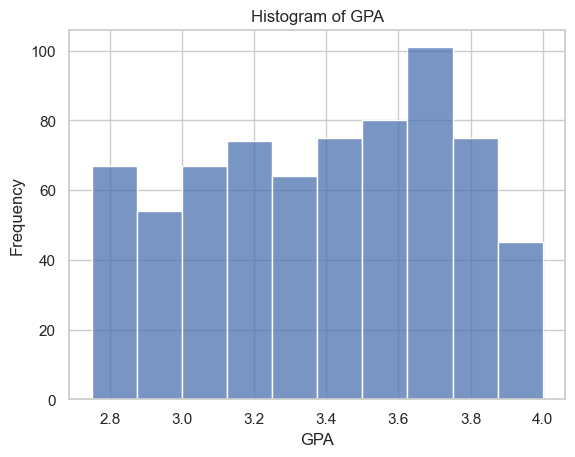

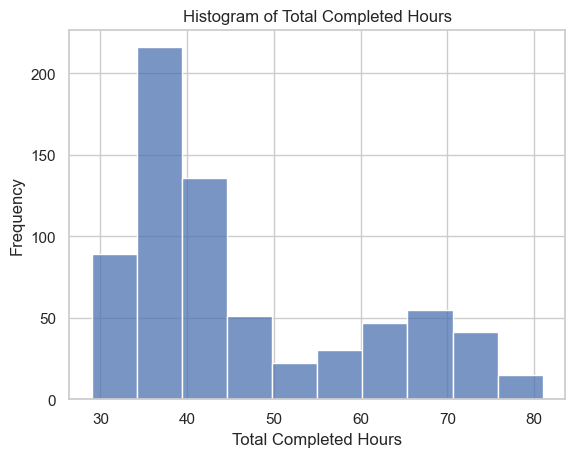

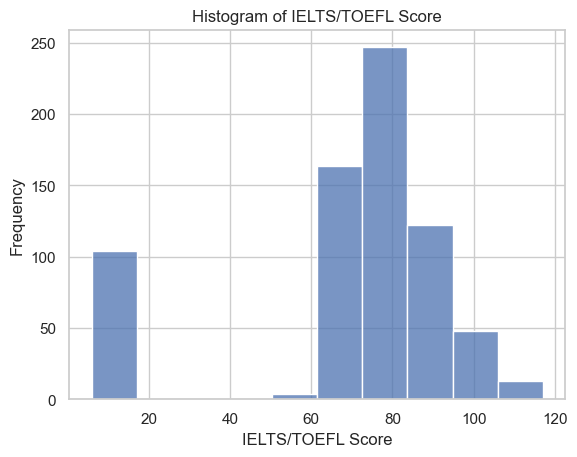

In [52]:
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.histplot(x=c, bins=10, data=df)
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()


Top 5 Host Universities:
Name of Host University
Colorado School of Mines     121
University of Florida         93
Georgia Tech                  87
University of North Texas     61
University of Cincinnati      55
Arizona State University      54
University of Arizona         43
Name: count, dtype: int64


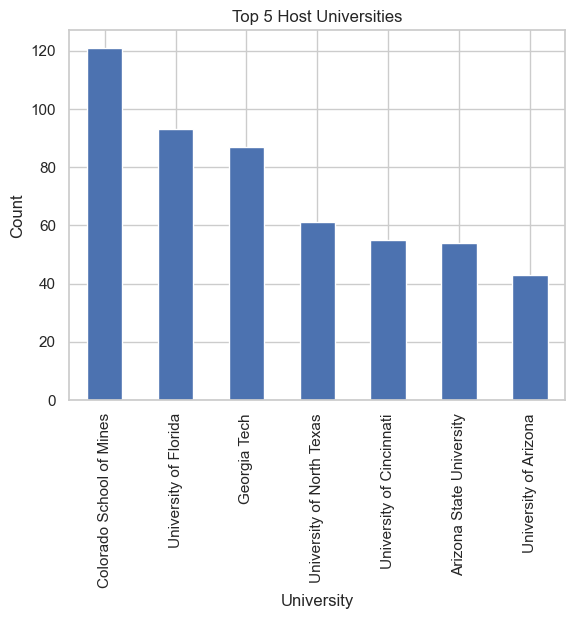

In [59]:
print("\nTop 5 Host Universities:")
print(df['Name of Host University'].value_counts().head(7))

plt.figure()
df['Name of Host University'].value_counts().head(7).plot(kind='bar')
plt.title('Top 5 Host Universities')
plt.xlabel('University')
plt.ylabel('Count')
plt.show()

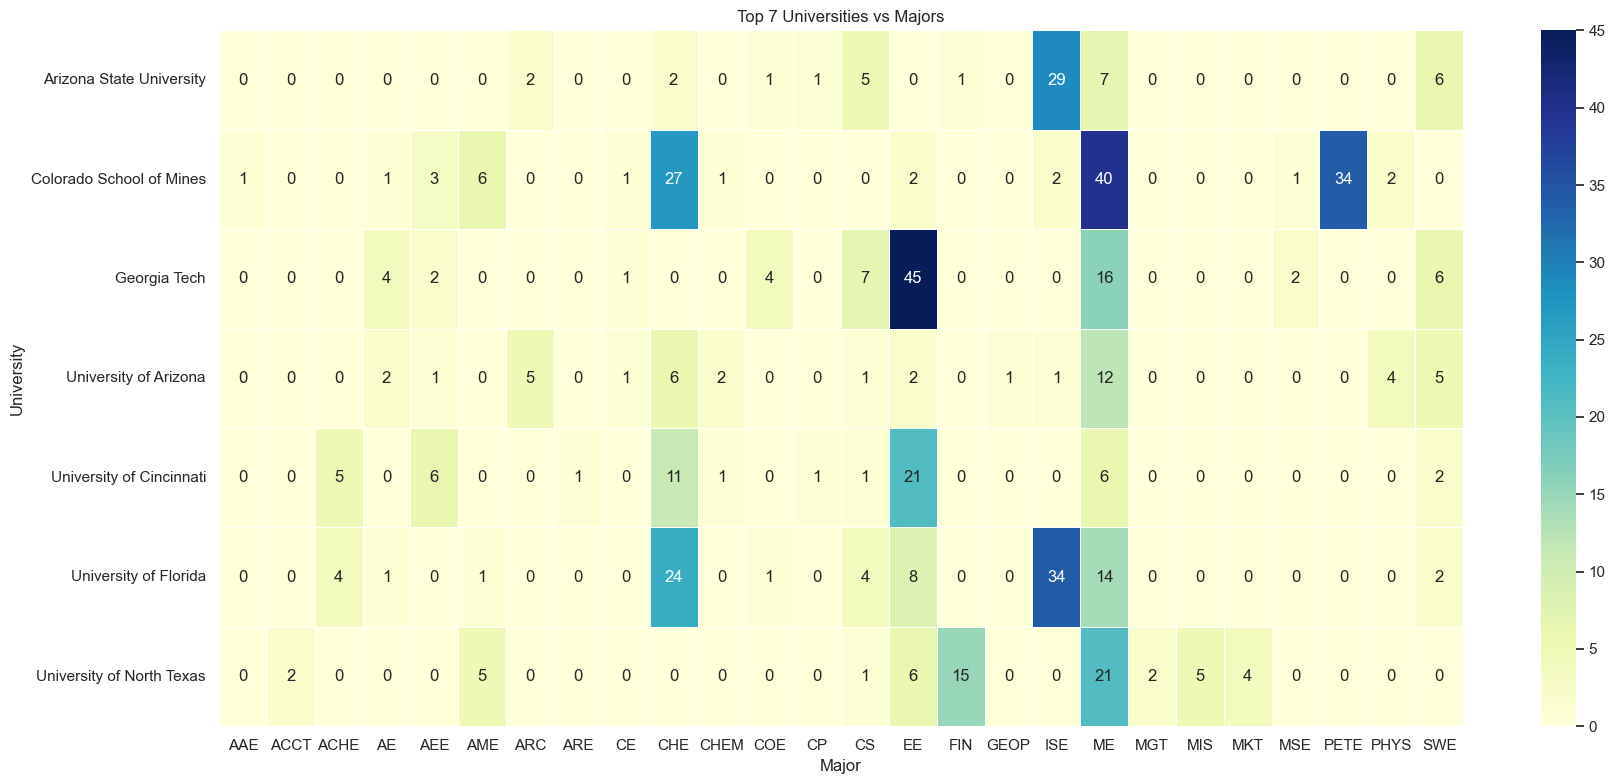

In [58]:
# Filter for the top 7 universities by number of students
top_7_unis = df['Name of Host University'].value_counts().head(7).index
filtered_df = df[df['Name of Host University'].isin(top_7_unis)]

# Group and pivot for heatmap
top7_uni_major_matrix = filtered_df.groupby(['Name of Host University', 'Major']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(top7_uni_major_matrix, cmap='YlGnBu', linewidths=0.5, annot=True, fmt="d")
plt.title('Top 7 Universities vs Majors')
plt.xlabel('Major')
plt.ylabel('University')
plt.tight_layout()
plt.show()


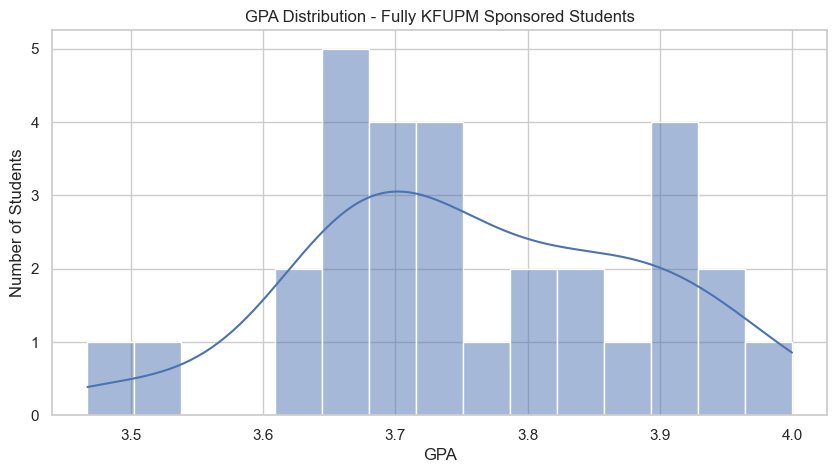

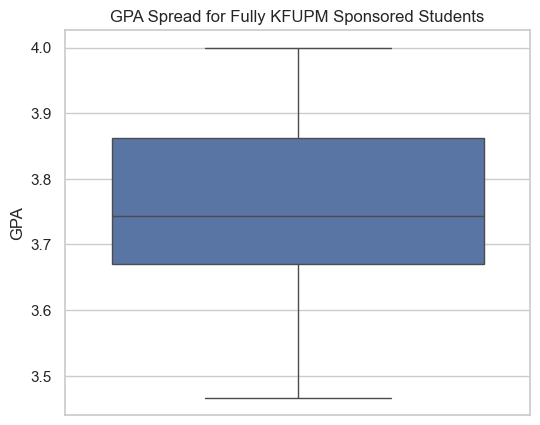

In [66]:
# Filter data for "Fully KFUPM" sponsor only
kfupm_df = df[df['Sponsor Name'] == 'Fully KFUPM']

# Create a histogram and boxplot to show GPA distribution under Fully KFUPM sponsor
plt.figure(figsize=(10, 5))
sns.histplot(kfupm_df['GPA'], bins=15, kde=True)
plt.title('GPA Distribution - Fully KFUPM Sponsored Students')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.show()

# Boxplot for GPA under Fully KFUPM
plt.figure(figsize=(6, 5))
sns.boxplot(y=kfupm_df['GPA'])
plt.title('GPA Spread for Fully KFUPM Sponsored Students')
plt.ylabel('GPA')
plt.show()


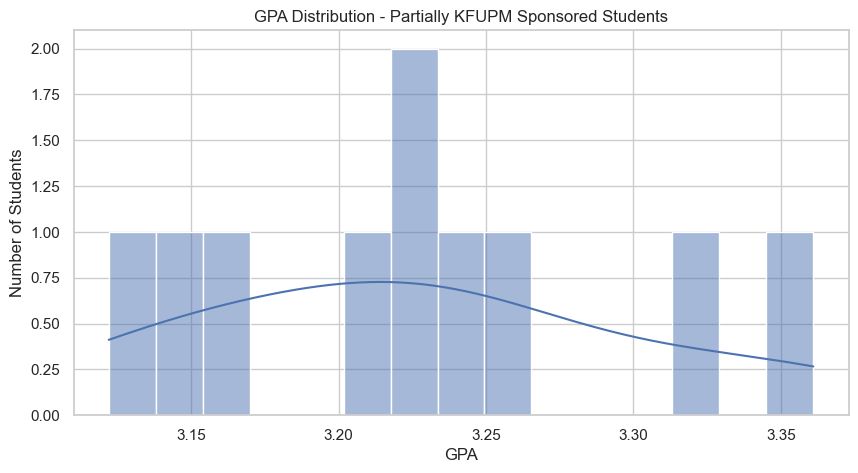

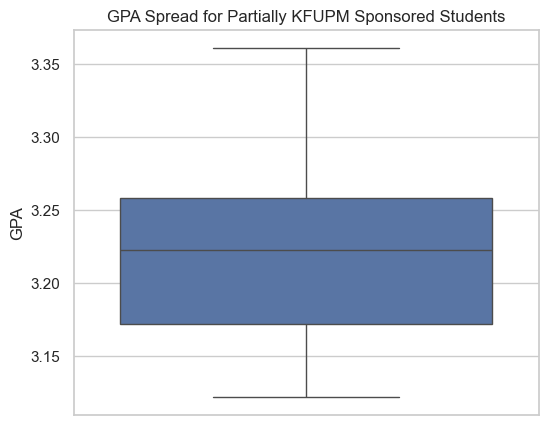

In [68]:
# Filter data for "Partialy KFUPM" sponsor only (note spelling)
partial_kfupm_df = df[df['Sponsor Name'] == 'Partialy KFUPM']

# Histogram of GPA for Partialy KFUPM sponsored students
plt.figure(figsize=(10, 5))
sns.histplot(partial_kfupm_df['GPA'], bins=15, kde=True)
plt.title('GPA Distribution - Partially KFUPM Sponsored Students')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.show()

# Boxplot of GPA for Partialy KFUPM sponsored students
plt.figure(figsize=(6, 5))
sns.boxplot(y=partial_kfupm_df['GPA'])
plt.title('GPA Spread for Partially KFUPM Sponsored Students')
plt.ylabel('GPA')
plt.show()
